# Regressão Linear

Este notebook implementa um modelo de regressão linear para prever preços de imóveis
a partir do conjunto de dados do Kaggle 'House Prices - Advanced Regression Techniques'.

### 1. Importações e configurações necessárias

In [1]:
# Importações necessárias

import os # Fornece funções para interagir com o sistema operacional.
import numpy as np # Fornece suporte para operações numéricas.
import pandas as pd # Fornece estruturas de dados e operações para manipulação de dados.
import matplotlib.pyplot as plt # Fornece suporte para criação de gráficos e visualizações.
import seaborn as sns # Fornece suporte para criação de gráficos estatísticos.
from pathlib import Path # Fornece suporte para manipulação de caminhos de arquivos.

In [2]:
# Importações do scikit-learn
from sklearn.model_selection import train_test_split # Fornece funções para divisão de conjuntos de dados em treino e teste.
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Fornece implementações de modelos de regressão linear.
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Fornece funções para pré-processamento de dados.
from sklearn.compose import ColumnTransformer # Fornece funções para transformação de colunas.
from sklearn.pipeline import Pipeline # Fornece funções para criação de pipelines de transformação e modelagem.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Fornece funções para avaliação de modelos.
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
# Configurações de exibição
pd.set_option('display.max_columns', None) #Mostra todas as colunas do DataFrame ao exibi-lo.
pd.set_option('display.max_rows', 100) #Mostra as primeiras 100 linhas do DataFrame ao exibi-lo.
plt.style.use('default')  # Usa o estilo padrão do Matplotlib
%matplotlib inline 

In [4]:
# Carregamento dos Dados
print("Carregando os dados...")
data_dir = Path('../data/raw') # Define o diretório de dados.
train_path = data_dir / 'train.csv' # Define o caminho do arquivo de treinamento.
test_path = data_dir / 'test.csv' # Define o caminho do arquivo de teste.

try:
    train_df = pd.read_csv(train_path) # Carrega o arquivo de treinamento.
    test_df = pd.read_csv(test_path) # Carrega o arquivo de teste.
    print(f"Dados de treino carregados: {train_df.shape}")
    print(f"Dados de teste carregados: {test_df.shape}")
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")
    raise

Carregando os dados...
Dados de treino carregados: (1460, 81)
Dados de teste carregados: (1459, 80)


### 2. Análise Exploratória de Dados (EDA)


Análise Exploratória de Dados...

Primeiras linhas do conjunto de treino:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Estatísticas descritivas:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



Valores ausentes por coluna:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

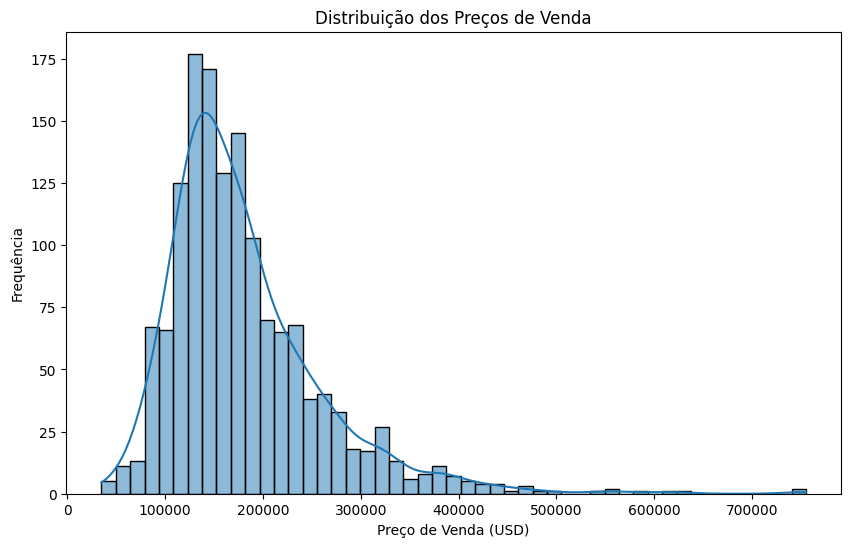

In [5]:
# Análise Exploratória de Dados (EDA)
print("\nAnálise Exploratória de Dados...")

# Visualização das primeiras linhas
print("\nPrimeiras linhas do conjunto de treino:")
display(train_df.head()) # Exibe as primeiras linhas do DataFrame.

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(train_df.describe()) # Exibe estatísticas descritivas do DataFrame.

# Verificação de valores ausentes
print("\nValores ausentes por coluna:")
missing = train_df.isnull().sum().sort_values(ascending=False) # Conta o número de valores ausentes em cada coluna.
missing = missing[missing > 0] # Filtra as colunas com valores ausentes.
display(missing) # Exibe as colunas com valores ausentes.

# Visualização da variável alvo (SalePrice)
plt.figure(figsize=(10, 6)) # Define o tamanho do gráfico.
sns.histplot(train_df['SalePrice'], kde=True) # Exibe a distribuição do preço de venda.
plt.title('Distribuição dos Preços de Venda') # Define o título do gráfico.
plt.xlabel('Preço de Venda (USD)') # Define o rótulo do eixo x.
plt.ylabel('Frequência') # Define o rótulo do eixo y.
plt.show() # Exibe o gráfico.

### 3. Pré-processamento dos Dados

In [6]:
# Pré-processamento dos Dados
print("\nPré-processamento dos dados...")

def preprocess_data(df, is_train=True):
    """Função para pré-processar os dados."""
    df = df.copy() # Cria uma cópia do DataFrame.
    
    # Remover colunas com muitos valores ausentes
    cols_to_drop = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'] # Lista de colunas a serem removidas.
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns]) # Remove as colunas.
    
    # Separar variáveis numéricas e categóricas
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # Lista de colunas numéricas.
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist() # Lista de colunas categóricas.
    
    # Preencher valores ausentes
    for col in numeric_cols: # Preenche valores ausentes com a mediana.
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())
    
    for col in categorical_cols: # Preenche valores ausentes com 'Missing'.
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna('Missing')
    
    # Codificação de variáveis categóricas
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df


Pré-processamento dos dados...


In [7]:
# Aplicar pré-processamento
try:
    # Pré-processar dados de treino
    X = train_df.drop('SalePrice', axis=1) # Remove a coluna 'SalePrice' do DataFrame.
    y = train_df['SalePrice'] # Define a coluna 'SalePrice' como alvo.
    
    X_processed = preprocess_data(X) # Aplica o pré-processamento aos dados de treino.
    
    # Garantir que os dados de teste tenham as mesmas colunas
    test_processed = preprocess_data(test_df, is_train=False) # Aplica o pré-processamento aos dados de teste.
    
    # Garantir que as colunas estejam na mesma ordem
    test_processed = test_processed.reindex(columns=X_processed.columns, fill_value=0) # Garante que as colunas estejam na mesma ordem.
    
    print("Pré-processamento concluído com sucesso!")
    print(f"Dimensões após pré-processamento: {X_processed.shape}")
    
except Exception as e:
    print(f"Erro durante o pré-processamento: {e}")
    raise

Pré-processamento concluído com sucesso!
Dimensões após pré-processamento: (1460, 242)


### 4. Modelagem

In [8]:
# Modelagem
print("\nTreinando o modelo de Regressão Linear...")

# Dividir os dados em conjuntos de treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Criar e treinar o modelo
model = LinearRegression() # Cria o modelo.
model.fit(X_train, y_train) # Treina o modelo.

# Fazer previsões
y_pred_train = model.predict(X_train) # Faz previsões no conjunto de treino.
y_pred_val = model.predict(X_val) # Faz previsões no conjunto de validação.


Treinando o modelo de Regressão Linear...


### 5. Avaliação do Modelo

In [9]:
# Avaliação do Modelo
print("\nAvaliando o modelo...")

def evaluate_model(y_true, y_pred, dataset_name):
    """Avalia o modelo usando várias métricas."""
    mse = mean_squared_error(y_true, y_pred) # Calcula o erro médio quadrático.
    rmse = np.sqrt(mse) # Calcula a raiz quadrada do erro médio quadrático.
    mae = mean_absolute_error(y_true, y_pred) # Calcula o erro médio absoluto.
    r2 = r2_score(y_true, y_pred) # Calcula o coeficiente de determinação.
    
    print(f"\nAvaliação no conjunto de {dataset_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }


Avaliando o modelo...


In [10]:
# Avaliar nos conjuntos de treino e validação
train_metrics = evaluate_model(y_train, y_pred_train, 'treino') # Avalia o modelo no conjunto de treino.
val_metrics = evaluate_model(y_val, y_pred_val, 'validação') # Avalia o modelo no conjunto de validação.


Avaliação no conjunto de treino:
MSE: 391020755.54
RMSE: 19774.24
MAE: 12765.39
R²: 0.9344

Avaliação no conjunto de validação:
MSE: 2735463739.78
RMSE: 52301.66
MAE: 20492.09
R²: 0.6434


### 6. Visualização dos Resultados


Visualizando os resultados...


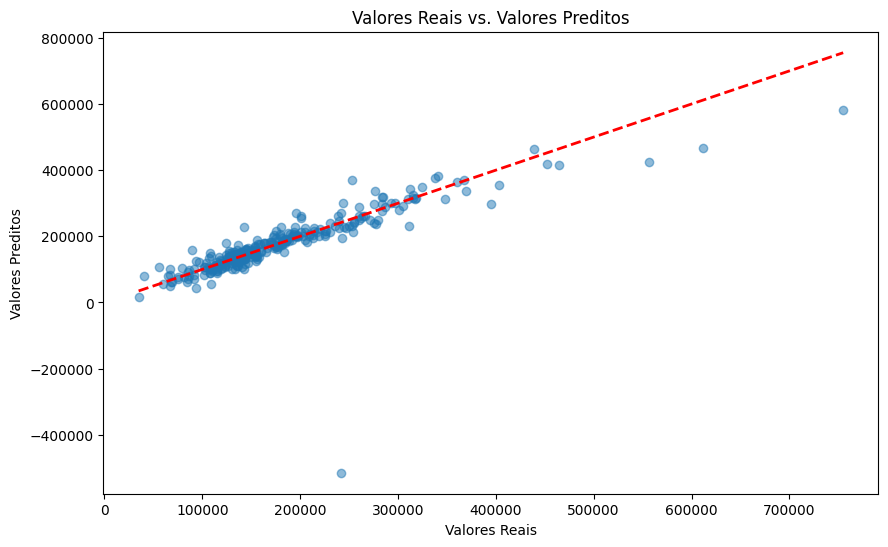

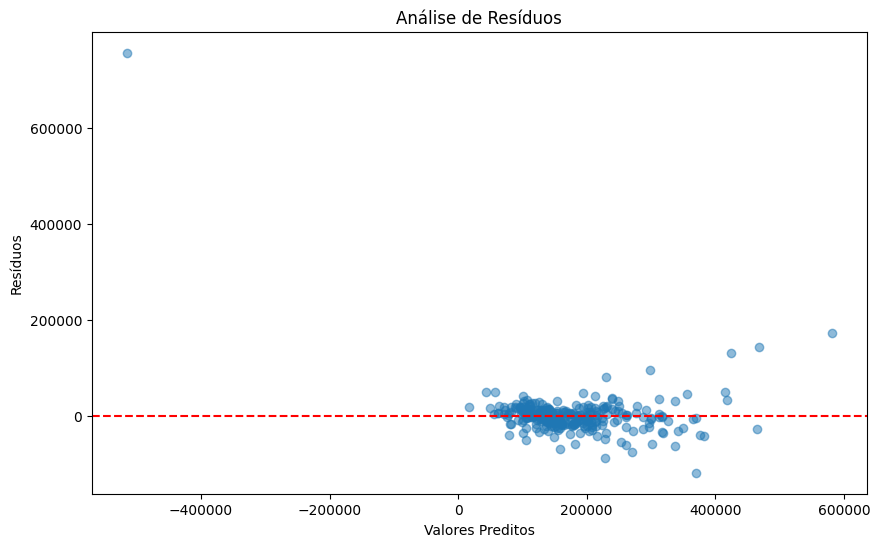

In [11]:
# Visualização dos Resultados
print("\nVisualizando os resultados...")

# Gráfico de dispersão: Valores reais vs. previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos')
plt.show()

# Gráfico de resíduos
residuals = y_val - y_pred_val # Calcula os resíduos.
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_val, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()

### 7. Feature Importance


7. Analisando a importância das variáveis...


C:\Users\aline\AppData\Local\Temp\ipykernel_19716\476151458.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


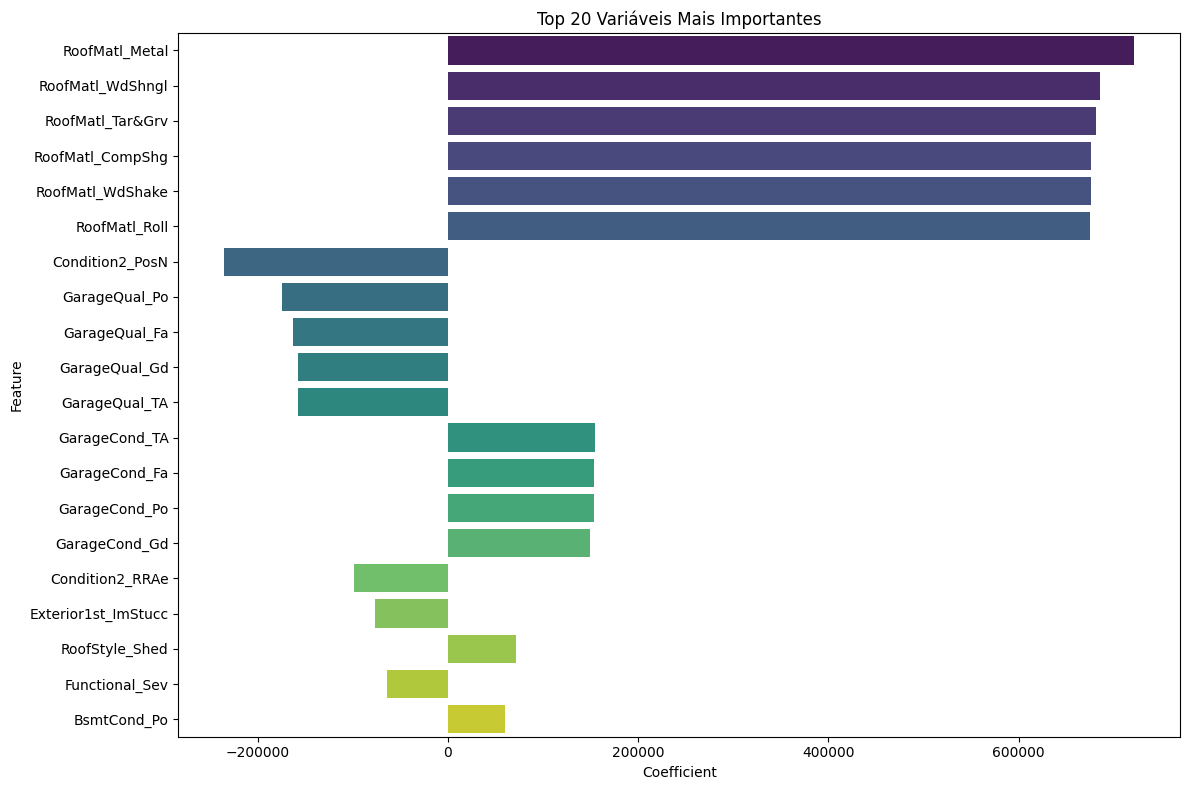

In [12]:
# Feature Importance
print("\n7. Analisando a importância das variáveis...")

# Coeficientes do modelo
feature_importance = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

# Mostrar as 20 variáveis mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=feature_importance.head(20),
    palette='viridis'
)
plt.title('Top 20 Variáveis Mais Importantes')
plt.tight_layout()
plt.show()

### 8. Submissão para o Kaggle

In [13]:
# Submissão para o Kaggle
print("\nGerando previsões para o conjunto de teste...")

try:
    # Fazer previsões no conjunto de teste
    test_pred = model.predict(test_processed)
    
    # Criar arquivo de submissão
    submission = pd.DataFrame({
        'Id': test_df['Id'],
        'SalePrice': test_pred
    })
    
    # Garantir que o diretório de saída existe
    output_dir = Path('../outputs')
    output_dir.mkdir(exist_ok=True)
    
    # Salvar o arquivo de submissão
    submission_path = output_dir / 'submission_linear_regression.csv'
    submission.to_csv(submission_path, index=False)
    print(f"Arquivo de submissão salvo em: {submission_path}")
    
except Exception as e:
    print(f"Erro ao gerar a submissão: {e}")

print("\nProcesso concluído com sucesso!")


Gerando previsões para o conjunto de teste...
Arquivo de submissão salvo em: ..\outputs\submission_linear_regression.csv

Processo concluído com sucesso!
